### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Raw EXFOR data visualization

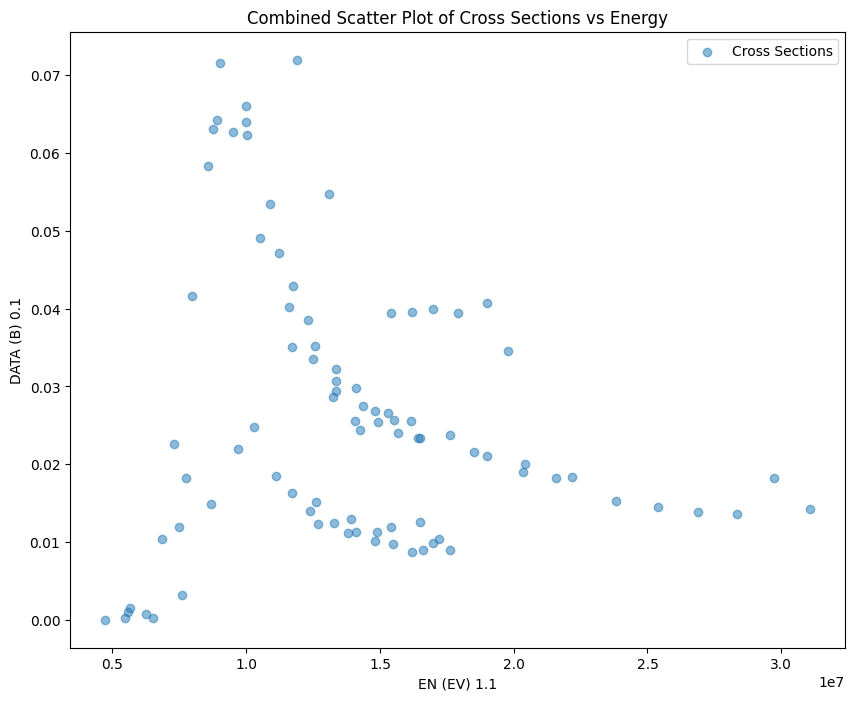

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Path to the folder containing CSV files
folder_path = r"D:\Academic Research\Cross Section Evaluation\186_Re from Tungsten\exfor_data"

# Columns you want to plot
column_y = 'DATA (B) 0.1'  # Replace with your x-axis column name
column_x = 'EN (EV) 1.1'  # Replace with your y-axis column name

# Initialize lists to collect data from all files
all_x = []
all_y = []

# Iterate through all files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):  # Only process CSV files
        file_path = os.path.join(folder_path, file_name)
        
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        # Check if the specified columns exist in the DataFrame
        if column_x in df.columns and column_y in df.columns:
            # Append the data to the lists
            all_x.extend(df[column_x])
            all_y.extend(df[column_y])
        else:
            print(f"Columns {column_x} or {column_y} not found in {file_name}")

# Plot all data on a single scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(all_x, all_y, alpha=0.5, label="Cross Sections")
plt.xlabel(column_x)
plt.ylabel(column_y)
plt.title('Combined Scatter Plot of Cross Sections vs Energy')
plt.legend()
plt.show()

### Utility Function

In [3]:
scaled_all_y = []

def plot_scaled_cross_section(df, scaling_factor):
    """
    Scales the cross-section data by a given factor and plots before and after scaling.

    Parameters:
    - df: DataFrame containing the cross-section data.
    - energy_col: Column name for energy values.
    - cross_section_col: Column name for cross-section values.
    - scaling_factor: Scaling factor to apply to the cross-section data.
    """
    
    # Plot original data
    plt.figure(figsize=(5, 3))
    plt.scatter(df["EN (EV) 1.1"], df["DATA (B) 0.1"], alpha=0.5, label="Original Cross Sections")
    plt.xlabel("Energy")
    plt.ylabel("Cross Section")
    plt.title('Scatter Plot of Original Cross Sections vs Energy')
    plt.legend()
    plt.show()
    
    # Scale the cross-section column
    scaled_df = df.copy()
    scaled_df["DATA (B) 0.1"] *= scaling_factor
    
    # Plot scaled data
    plt.figure(figsize=(5, 3))
    plt.scatter(scaled_df["EN (EV) 1.1"], scaled_df["DATA (B) 0.1"], alpha=0.5, label="Scaled Cross Sections")
    plt.xlabel("Energy")
    plt.ylabel("Cross Section")
    plt.title('Scatter Plot of Scaled Cross Sections vs Energy')
    plt.legend()
    plt.show()

    scaled_all_y.extend(scaled_df['DATA (B) 0.1'])
    
    return scaled_df['DATA (B) 0.1']

### Bonardi Data correction

Correction is done by a scaling factor, scaling factor is the ratio of latest gamma intensity to the intensity used in the paper.

In [4]:
bonardi = pd.read_csv(r'exfor_data\Bonardi_O1884008.csv')
bonardi.head()

,DatasetID,year1,author1,DATA (B) 0.1,DATA-ERR (B) 0.911,ERR-S (PER-CENT) 0.944,ERR-1 (PER-CENT) 0.955,ERR-2 (PER-CENT) 0.955,ERR-3 (PER-CENT) 0.955,ERR-4 (PER-CENT) 0.955,...,Proj,Emission,Prod,MF,MT,ReacType,Quant1,nx,indVars,Reacode
0,O1884008,2011,M.L.Bonardi+,0.01821,0.00099,0.05,1,1.5,2,3,...,P,N,75-RE-186-G,3,4,CS,CS,1,2,"74-W-186(P,N)75-RE-186-G,,SIG"
1,O1884008,2011,M.L.Bonardi+,0.01897,0.00099,0.05,1,1.5,2,3,...,P,N,75-RE-186-G,3,4,CS,CS,1,2,"74-W-186(P,N)75-RE-186-G,,SIG"
2,O1884008,2011,M.L.Bonardi+,0.02106,0.00106,0.05,1,1.5,2,3,...,P,N,75-RE-186-G,3,4,CS,CS,1,2,"74-W-186(P,N)75-RE-186-G,,SIG"
3,O1884008,2011,M.L.Bonardi+,0.02376,0.00115,0.05,1,1.5,2,3,...,P,N,75-RE-186-G,3,4,CS,CS,1,2,"74-W-186(P,N)75-RE-186-G,,SIG"
4,O1884008,2011,M.L.Bonardi+,0.02342,0.00106,0.05,1,1.5,2,3,...,P,N,75-RE-186-G,3,4,CS,CS,1,2,"74-W-186(P,N)75-RE-186-G,,SIG"


In [1]:
# Finding the scaling factor
bonardi_gamma_previous = 8.22
bonardi_gamma_latest = 9.47
bonardi_scaling_factor = bonardi_gamma_latest / bonardi_gamma_previous

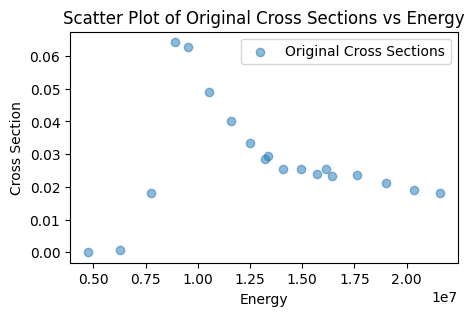

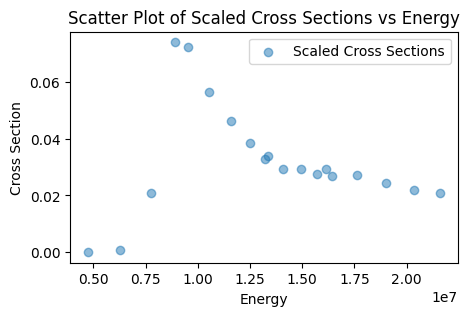

0     0.020979
1     0.021855
2     0.024263
3     0.027373
4     0.026981
5     0.029504
6     0.027638
7     0.029366
8     0.029481
9     0.033917
10    0.033030
11    0.038560
12    0.046348
13    0.056567
14    0.072235
15    0.073997
16    0.020956
17    0.000922
18    0.000016
Name: DATA (B) 0.1, dtype: float64

In [6]:
plot_scaled_cross_section(bonardi, scaling_factor=bonardi_scaling_factor)

### Shigeta Correction

In [7]:
shigeta_df = pd.read_csv(r"exfor_data\Shigeta_E2082002.csv")
shigeta_df.head()

,DatasetID,year1,author1,DATA (B) 0.1,ERR-T (B) 0.911,ERR-1 (PER-CENT) 0.955,ERR-2 (PER-CENT) 0.955,EN (EV) 1.1,zaTarg1,Targ1,Proj,Emission,Prod,MF,MT,ReacType,Quant1,nx,indVars,Reacode
0,E2082002,1996,N.Shigeta+,0.000213,0.000036,3,3,5470000.0,74186,74-W-186,P,N,75-RE-186-G,3,4,CS,CS,1,2,"74-W-186(P,N)75-RE-186-G,,SIG"
1,E2082002,1996,N.Shigeta+,0.011900,0.001300,3,3,7500000.0,74186,74-W-186,P,N,75-RE-186-G,3,4,CS,CS,1,2,"74-W-186(P,N)75-RE-186-G,,SIG"
2,E2082002,1996,N.Shigeta+,0.058300,0.007200,3,3,8580000.0,74186,74-W-186,P,N,75-RE-186-G,3,4,CS,CS,1,2,"74-W-186(P,N)75-RE-186-G,,SIG"
3,E2082002,1996,N.Shigeta+,0.066000,0.006000,3,3,10000000.0,74186,74-W-186,P,N,75-RE-186-G,3,4,CS,CS,1,2,"74-W-186(P,N)75-RE-186-G,,SIG"
4,E2082002,1996,N.Shigeta+,0.072000,0.020000,3,3,11900000.0,74186,74-W-186,P,N,75-RE-186-G,3,4,CS,CS,1,2,"74-W-186(P,N)75-RE-186-G,,SIG"


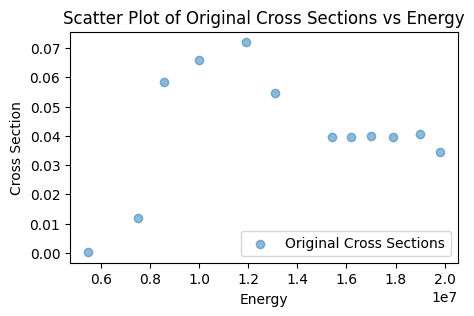

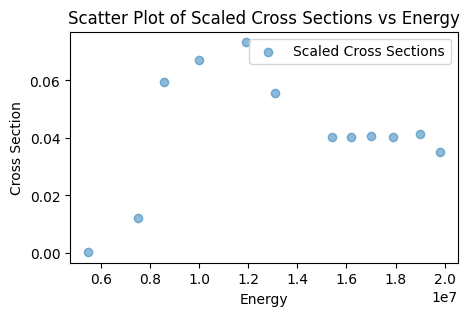

0     0.000217
1     0.012118
2     0.059366
3     0.067206
4     0.073316
5     0.055802
6     0.040222
7     0.040324
8     0.040629
9     0.040222
10    0.041444
11    0.035131
Name: DATA (B) 0.1, dtype: float64

In [8]:
# Note: The two extreme values are manually excluded. 

shigeta_scaling_factor = 9.47/9.3

plot_scaled_cross_section(shigeta_df, shigeta_scaling_factor)

### Lapi Correction

In [9]:
lapi_df = pd.read_csv(r"exfor_data\Lapi_C1501007.csv")
lapi_df.head()

,DatasetID,year1,author1,DATA (B) 0.1,ERR-T (B) 0.911,ERR-S (PER-CENT) 0.944,ERR-1 (PER-CENT) 0.955,ERR-2 (PER-CENT) 0.955,ERR-3 (PER-CENT) 0.955,EN (EV) 1.1,...,Proj,Emission,Prod,MF,MT,ReacType,Quant1,nx,indVars,Reacode
0,C1501007,2007,S.Lapi+,0.00898,0.00064,1,5,5,5,17600000.0,...,P,N,75-RE-186-G,3,4,CS,CS,1,2,"74-W-186(P,N)75-RE-186-G,,SIG"
1,C1501007,2007,S.Lapi+,0.01040,0.00070,1,5,5,5,17200000.0,...,P,N,75-RE-186-G,3,4,CS,CS,1,2,"74-W-186(P,N)75-RE-186-G,,SIG"
2,C1501007,2007,S.Lapi+,0.00993,0.00071,1,5,5,5,17000000.0,...,P,N,75-RE-186-G,3,4,CS,CS,1,2,"74-W-186(P,N)75-RE-186-G,,SIG"
3,C1501007,2007,S.Lapi+,0.00902,0.00064,1,5,5,5,16600000.0,...,P,N,75-RE-186-G,3,4,CS,CS,1,2,"74-W-186(P,N)75-RE-186-G,,SIG"
4,C1501007,2007,S.Lapi+,0.01260,0.00090,1,5,5,5,16500000.0,...,P,N,75-RE-186-G,3,4,CS,CS,1,2,"74-W-186(P,N)75-RE-186-G,,SIG"


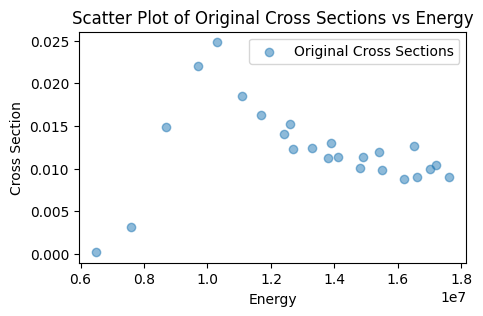

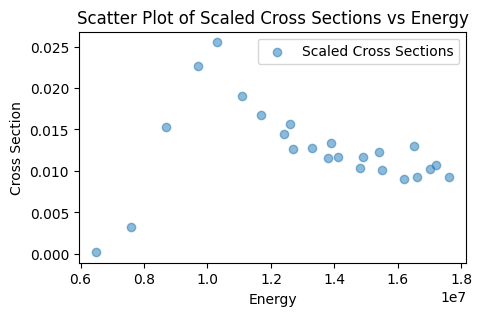

0     0.009244
1     0.010705
2     0.010221
3     0.009285
4     0.012970
5     0.009038
6     0.010098
7     0.012249
8     0.011632
9     0.010396
10    0.011632
11    0.013382
12    0.011529
13    0.012764
14    0.012661
15    0.015646
16    0.014411
17    0.016778
18    0.019043
19    0.025528
20    0.022646
21    0.015337
22    0.003263
23    0.000196
Name: DATA (B) 0.1, dtype: float64

In [10]:
lapi_scaling_factor = 9.47/9.2
plot_scaled_cross_section(lapi_df, lapi_scaling_factor)

### Tarkanyi Correction

In [11]:
tarkanyi_df = pd.read_csv(r"exfor_data\Tarkanyi_D4193002.csv")
tarkanyi_df.head()

,DatasetID,year1,author1,DATA (B) 0.1,DATA-ERR (B) 0.911,EN (EV) 1.1,EN-ERR (EV) 1.911,zaTarg1,Targ1,Proj,Emission,Prod,MF,MT,ReacType,Quant1,nx,indVars,Reacode
0,D4193002,2007,F.Tarkanyi+,0.00098,0.00012,5570000.0,1120000.0,74186,74-W-186,P,N,75-RE-186-G,3,4,CS,CS,1,2,"74-W-186(P,N)75-RE-186-G,,SIG"
1,D4193002,2007,F.Tarkanyi+,0.00151,0.00022,5660000.0,1070000.0,74186,74-W-186,P,N,75-RE-186-G,3,4,CS,CS,1,2,"74-W-186(P,N)75-RE-186-G,,SIG"
2,D4193002,2007,F.Tarkanyi+,0.01039,0.00127,6850000.0,1010000.0,74186,74-W-186,P,N,75-RE-186-G,3,4,CS,CS,1,2,"74-W-186(P,N)75-RE-186-G,,SIG"
3,D4193002,2007,F.Tarkanyi+,0.02258,0.00277,7310000.0,940000.0,74186,74-W-186,P,N,75-RE-186-G,3,4,CS,CS,1,2,"74-W-186(P,N)75-RE-186-G,,SIG"
4,D4193002,2007,F.Tarkanyi+,0.04162,0.00510,7990000.0,920000.0,74186,74-W-186,P,N,75-RE-186-G,3,4,CS,CS,1,2,"74-W-186(P,N)75-RE-186-G,,SIG"


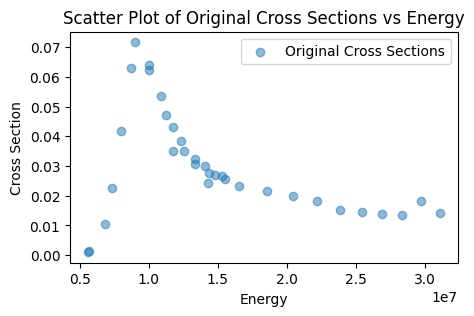

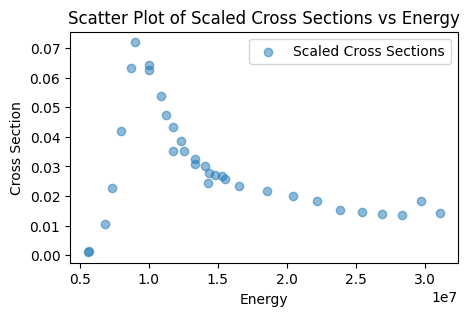

0     0.000985
1     0.001518
2     0.010445
3     0.022700
4     0.041841
5     0.063375
6     0.072010
7     0.064310
8     0.062590
9     0.053754
10    0.047360
11    0.035246
12    0.043178
13    0.038745
14    0.035347
15    0.032391
16    0.030893
17    0.029998
18    0.024540
19    0.027696
20    0.027033
21    0.026761
22    0.025806
23    0.023544
24    0.021674
25    0.020116
26    0.018407
27    0.015361
28    0.014627
29    0.013903
30    0.013632
31    0.018327
32    0.014376
Name: DATA (B) 0.1, dtype: float64

In [12]:
tarkanyi_scaling_factor = 9.47/9.42
plot_scaled_cross_section(tarkanyi_df, tarkanyi_scaling_factor)

### Final Plot

In [13]:
len(all_y)

88

In [14]:
len(scaled_all_y)

88

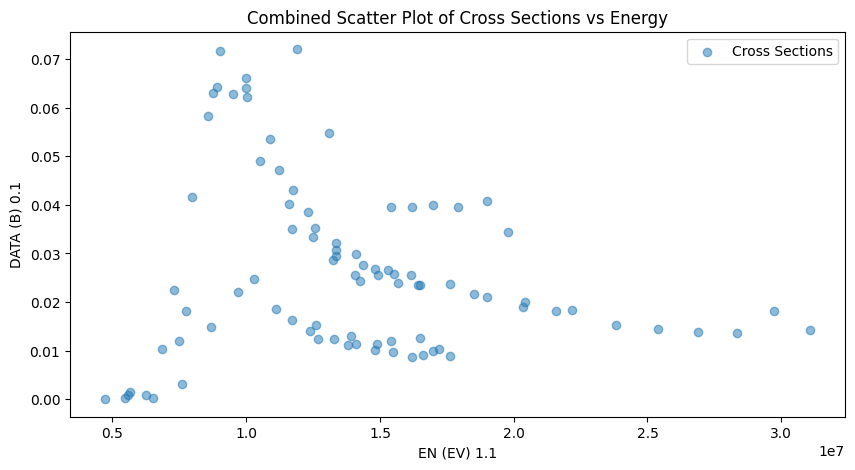

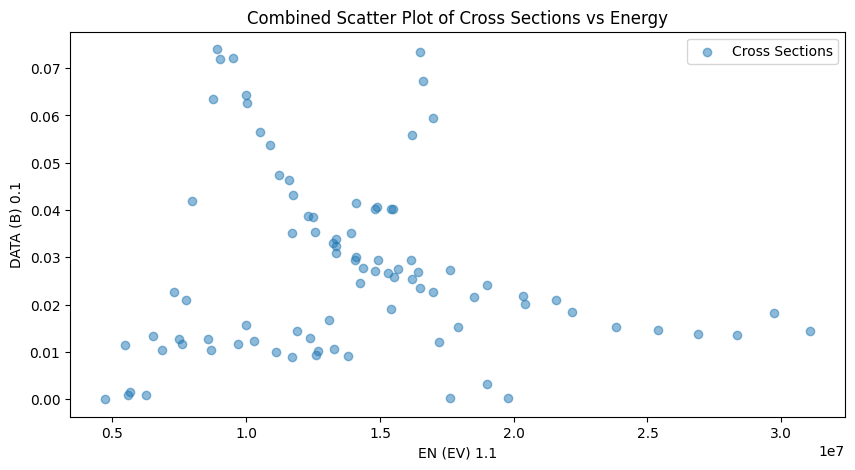

In [15]:
# Plot all data on a single scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(all_x, all_y, alpha=0.5, label="Cross Sections")
plt.xlabel(column_x)
plt.ylabel(column_y)
plt.title('Combined Scatter Plot of Cross Sections vs Energy')
plt.legend()
plt.show()

# Plot all data on a single scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(all_x, scaled_all_y, alpha=0.5, label="Cross Sections")
plt.xlabel(column_x)
plt.ylabel(column_y)
plt.title('Combined Scatter Plot of Cross Sections vs Energy')
plt.legend()
plt.show()

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def plot_combined_cross_section(all_x, all_y, scaled_all_y, x_label="Energy", y_label="Cross Section"):
    """
    Plots original and scaled cross-section data on a single scatter plot with separate colors.
    
    Parameters:
    - all_x: List or array of energy values.
    - all_y: List or array of original cross-section values.
    - scaled_all_y: List or array of scaled cross-section values.
    - x_label: Label for the x-axis.
    - y_label: Label for the y-axis.
    """

    # Create figure and axes
    plt.figure(figsize=(10, 5))
    
    # Scatter plot for original data
    plt.scatter(all_x, all_y, color="blue", alpha=0.6, label="Original Cross Sections", marker='o')
    
    # Scatter plot for scaled data
    plt.scatter(all_x, scaled_all_y, color="red", alpha=0.6, label="Scaled Cross Sections", marker='x')
    
    # Add labels, title, and legend
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.title('Cross Sections vs Energy', fontsize=14)
    plt.legend(loc="upper left", fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.5)
    
    # Show plot
    plt.tight_layout()
    plt.show()


In [17]:
all_y_mb = np.array(all_y) * 1000
scaled_all_y_mb = np.array(scaled_all_y) * 1000
all_x_MeV = np.array(all_x) / 1000000

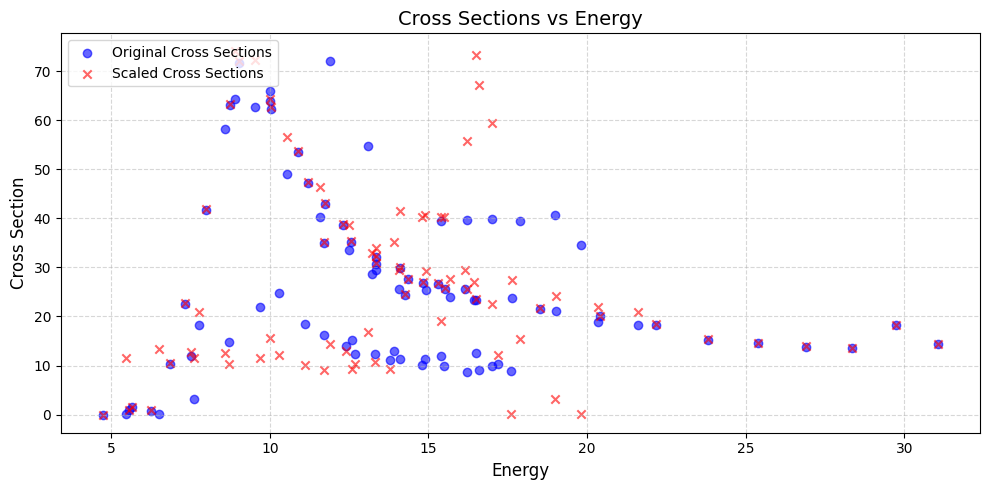

In [18]:
plot_combined_cross_section(all_x_MeV, all_y_mb, scaled_all_y_mb)

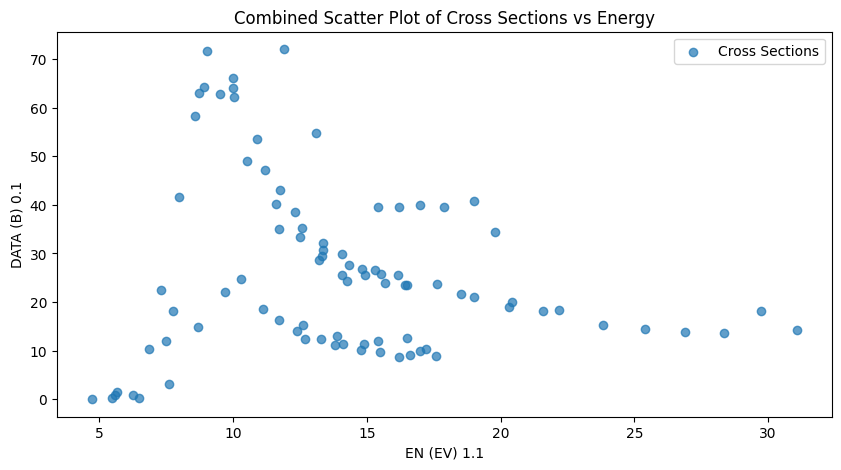

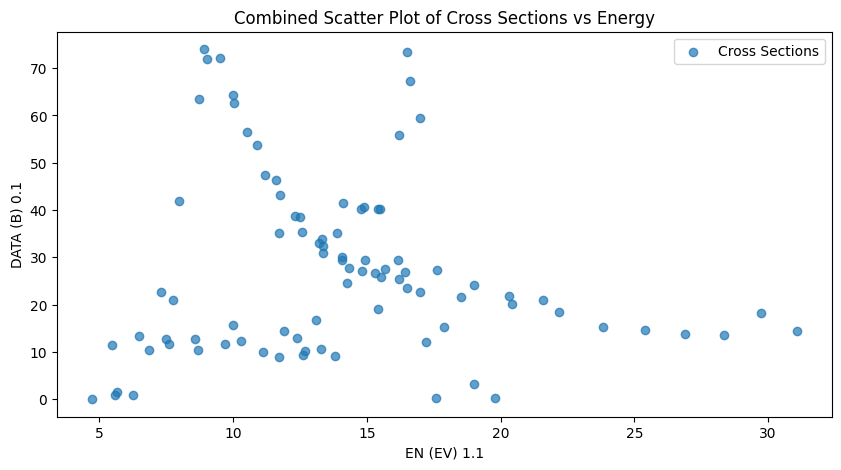

In [19]:
# Plot all data on a single scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(all_x_MeV, all_y_mb, alpha=0.7, label="Cross Sections")
plt.xlabel(column_x)
plt.ylabel(column_y)
plt.title('Combined Scatter Plot of Cross Sections vs Energy')
plt.legend()
plt.show()

# Plot all data on a single scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(all_x_MeV, scaled_all_y_mb, alpha=0.7, label="Cross Sections")
plt.xlabel(column_x)
plt.ylabel(column_y)
plt.title('Combined Scatter Plot of Cross Sections vs Energy')
plt.legend()
plt.show()